# Summarizing cross-section metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [12]:
ss,u = me.importStillsSummary(diag=True)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'vert_vN', '

In [38]:
sims,usim = plainIm(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\openfoam\summaries\viscositysweep\summaryTable_x_5_t_2.5.csv', ic=0)

In [46]:
simscone,usimcone = plainIm(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\openfoam\summaries\conicalNozzle\summaryTable_x_5_t_2.5.csv', ic=0)

### cross-section

### aspect ratio

In [121]:
ss0 = ss[(ss.ink_type=='mineral oil')&((ss.ink_val==5)|(ss.ink_val==6))&(ss.sup_val==3)&(ss.sweepType=='visc_20')]
ss0[['bn', 'int_Ca', 'viscRatio', 'xs_aspect', 'xs_areaN','horiz_totlenN']]

,bn,int_Ca,viscRatio,xs_aspect,xs_areaN,horiz_totlenN
159,I_M5_S_3.00_210519,2.353434,0.064761,1.901065,1.373326,NaN
160,I_M5_S_3.00_210921,2.353434,0.064761,1.184014,0.000045,0.726281
180,I_M6_S_3.00_210519,2.353434,0.087364,1.621585,1.880316,NaN
181,I_M6_S_3.00_210824,2.353434,0.087364,1.161895,1.794528,0.790457
182,I_M6_S_3.00_210921,2.353434,0.087364,1.133637,0.000020,0.794978


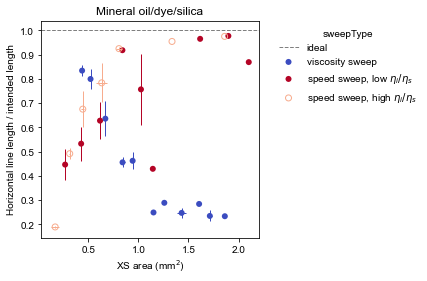

In [126]:
ss0 = ss[(ss.ink_type=='mineral oil')]
ss0.loc[ss0.sweepType=='speed_20_low_visc_ratio', 'sweepType'] = 'speed sweep, low $\eta_i/\eta_s$'
ss0.loc[ss0.sweepType=='speed_20_high_visc_ratio', 'sweepType'] = 'speed sweep, high $\eta_i/\eta_s$'
ss0.loc[ss0.sweepType=='visc_20', 'sweepType'] = 'viscosity sweep'
fig, ax = mp.sweepTypeSS(ss0, 'xs_area', 'horiz_totlenN', yideal=1)
ax.set_xlabel('XS area (mm$^2$)')
ax.set_ylabel('Horizontal line length / intended length')
ax.set_title('Mineral oil/dye/silica')
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'area_length.pdf'), bbox_inches='tight', dpi=150)

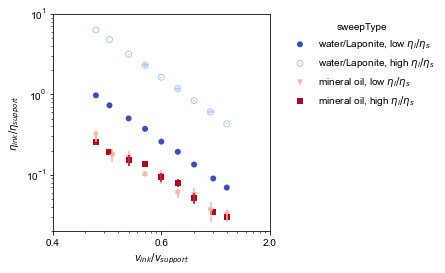

In [73]:
sslap = ss.copy()
sslap = sslap[sslap.sweepType.str.contains('speed')]
sslap.loc[sslap.sweepType=='speed_20_low_visc_ratio', 'sweepType'] = 'mineral oil, low $\eta_i/\eta_s$'
sslap.loc[sslap.sweepType=='speed_20_high_visc_ratio', 'sweepType'] = 'mineral oil, high $\eta_i/\eta_s$'
sslap.loc[sslap.sweepType=='speed_0_high_visc_ratio', 'sweepType'] = 'water/Laponite, high $\eta_i/\eta_s$'
sslap.loc[sslap.sweepType=='speed_0_low_visc_ratio', 'sweepType'] = 'water/Laponite, low $\eta_i/\eta_s$'
fig, ax=mp.scatterSS(sslap, 'vRatio', 'viscRatio', 'sweepType', logx=True, logy=True, dx=0, fontsize=10)
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_xticks([0.1, 1, 10])
ax.set_yticks([0.1, 1, 10])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.set_xlabel('$v_{ink}/v_{support}$')
ax.set_ylabel('$\eta_{ink}/\eta_{support}$')
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vratio viscratio.pdf'), bbox_inches='tight', dpi=150)

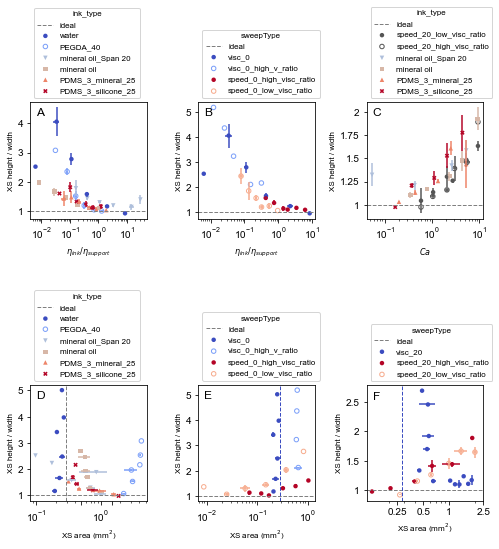

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [55]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
ssca = ss1.copy()
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(7, 8))
ylog = False
fs = 8
ms = 20

# vratio=1
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'ax':axs[0][0], 'legend':True, 'units':u, 'dx':0.2, 'fontsize':fs, 'markersize':ms}
mp.scatterSS(ss1[ss1.vRatio==1], 'viscRatio', 'xs_aspect', 'ink_type', yideal=1, **kwargs)

# speed/viscosity
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'ax':axs[0][1], 'legend':True, 'units':u, 'dx':0.2, 'fontsize':fs, 'markersize':ms}
mp.sweepTypeSS(sslap, 'viscRatio', 'xs_aspect', yideal=1, **kwargs)

# dEst
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'ax':axs[0][2], 'legend':True, 'units':u, 'dx':0.2, 'fontsize':fs, 'markersize':ms}
mp.scatterSS(ssca[(ssca.sweepType.str.startswith('speed'))&(ssca.sigma>0)], 'int_Ca', 'xs_aspect', 'sweepType', color='#555555', **kwargs)
mp.scatterSS(ssca[(ssca.vRatio==1)], 'int_Ca', 'xs_aspect', 'ink_type', yideal=1, **kwargs)
axs[0][2].set_yticks([1, 1.25, 1.5, 1.75, 2])
axs[0][2].set_yticklabels([1, 1.25, 1.5, 1.75, 2])
mp.setSquare(axs[0][2])

# area aspect
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'yideal':1,  'units':u, 'legend':True, 'dy':0.2, 'dx':1, 'fontsize':fs, 'markersize':ms}
mp.scatterSS(ss0[(ss0.vRatio==1)], 'xs_area', 'xs_aspect',  'ink_type', xideal=(np.pi*(cfg.const.di/2)**2), ax=axs[1][0], **kwargs)

# lap sweep type
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'units':u, 'legend':True, 'ax':axs[1][1], 'fontsize':fs, 'markersize':ms}
mp.sweepTypeSS(sslap[sslap.sweepType.str.startswith('visc')],  'xs_area', 'xs_aspect', dx=1, dy=0.2, yideal=1, **kwargs)
mp.sweepTypeSS(sslap[sslap.sweepType.str.startswith('speed')],  'xs_area', 'xs_aspect', dx=0.2, dy=1, **kwargs)
axs[1][1].axvline((np.pi*(cfg.const.di/2)**2), 0,1, color=cmap(0), linestyle='--', linewidth=1, label='ideal')

# mineral 
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'units':u, 'ax':axs[1][2], 'fontsize':fs, 'markersize':ms}
p1ss = ssmin[(ssmin.sweepType.str.startswith('speed'))|((ssmin.sweepType.str.startswith('visc'))&(ssmin.xs_area>1))]
mp.sweepTypeSS(p1ss, 'xs_area', 'xs_aspect', yideal=1, legend=True, dx=0.2, dy=1, **kwargs)
mp.sweepTypeSS(ssmin[(ssmin.sweepType.str.startswith('visc'))&(ssmin.xs_area<1)],  'xs_area', 'xs_aspect', dx=1, dy=0.2, legend=False, **kwargs)
axs[1][2].axvline((np.pi*(cfg.const.di/2)**2), 0,1, color=cmap(0), linestyle='--', linewidth=1, label='ideal')
axs[1][2].set_xticks([0.25, 0.5, 1, 2.5])
axs[1][2].set_xticklabels([0.25, 0.5, 1, 2.5])
axs[1][2].set_yticks([1, 1.5, 2, 2.5])
axs[1][2].set_yticklabels([1, 1.5, 2, 2.5])

for axrow in axs:
    for ax in axrow:
        ax.set_ylabel('XS height / width', fontsize=fs)
for i in [0,1]:
    axs[0][i].set_xlabel('${\eta}_{ink}/{\eta}_{support}$', fontsize=fs)
axs[0][2].set_xlabel('$Ca$', fontsize=fs)
for i in [0,1,2]:
    axs[1][i].set_xlabel('XS area (mm$^2$)', fontsize=fs)

fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect.svg'), bbox_inches='tight', dpi=300)

In [59]:
len(axs.shape)

1

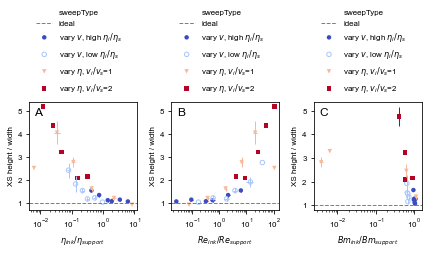

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [105]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
fig,axs = plt.subplots(1,3,figsize=(6, 4))
ylog = False
fs = 8
ms = 20
sslap = me.addRatios(sslap, ['Bm'], operator='Ratio')
sslap.loc[sslap.sweepType=='visc_0', 'sweepType'] = 'vary $\eta$, $v_i/v_s$=1'
sslap.loc[sslap.sweepType=='visc_0_high_v_ratio', 'sweepType'] = 'vary $\eta$, $v_i/v_s$=2'
sslap.loc[sslap.sweepType=='speed_0_high_visc_ratio', 'sweepType'] = 'vary $v$, high $\eta_i/\eta_s$'
sslap.loc[sslap.sweepType=='speed_0_low_visc_ratio', 'sweepType'] = 'vary $v$, low $\eta_i/\eta_s$'
# speed/viscosity
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'legend':True, 'units':u, 'dx':0.2, 'fontsize':fs, 'markersize':ms}
for i, s in enumerate(['viscRatio', 'ReRatio', 'BmRatio']):
    mp.scatterSS(sslap, s, 'xs_aspect', 'sweepType', yideal=1, ax=axs[i], **kwargs)


for ax in axs:
    ax.set_ylabel('XS height / width', fontsize=fs)
axs[0].set_xlabel('${\eta}_{ink}/{\eta}_{support}$', fontsize=fs)
axs[1].set_xlabel('${Re}_{ink}/{Re}_{support}$', fontsize=fs)
axs[2].set_xlabel('${Bm}_{ink}/{Bm}_{support}$', fontsize=fs)

fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'xs_aspect_zero.pdf'), bbox_inches='tight', dpi=300)

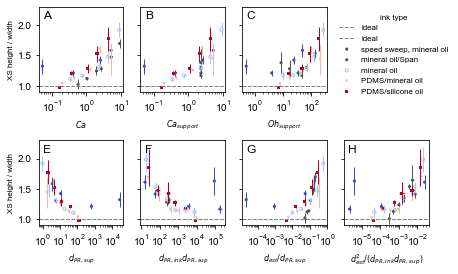

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [104]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.sigma>0]
sslap = sslap.sort_values(by='sweepType')
fig,axs = plt.subplots(2,4,figsize=(7, 4.5), sharey=True)
ylog = False
fs = 8
ms = 10
sslap = me.flipInv(sslap, ['dnorm', 'Oh'])
sslap = me.addRatios(sslap, ['dPR', 'dnorm'], operator='Prod')
sslap.sort_values(by='sigma', inplace=True)
mp.simplifyType(sslap)
sslap.loc[sslap.sweepType=='speed_20', 'sweepType'] = 'speed sweep, mineral oil'
sslap.loc[sslap.ink_type=='PDMS_3_mineral_25', 'ink_type'] = 'PDMS/mineral oil'
sslap.loc[sslap.ink_type=='PDMS_3_silicone_25', 'ink_type'] = 'PDMS/silicone oil'
sslap.loc[sslap.ink_type=='mineral oil_Span 20', 'ink_type'] = 'mineral oil/Span'
# speed/viscosity
kwargs = {'logx':True, 'logy':ylog, 'gradColor':0, 'units':u, 'dx':0.2, 'fontsize':fs, 'markersize':ms}
for i, s in enumerate(['int_Ca', 'sup_Ca', 'sup_Oh']):
    mp.sweepTypeSS(sslap, s, 'xs_aspect', yideal=1, ax=axs[0][i], legend=(i==2), legendloc='right', **kwargs)
for i, s in enumerate(['sup_dPR', 'dPRProd', 'sup_dnorm', 'dnormProd']):
    mp.sweepTypeSS(sslap, s, 'xs_aspect', yideal=1, ax=axs[1][i], legend=False, **kwargs)
    
axs[0, 3].remove()  # don't display empty ax

for axrow in axs:
    for ax in axrow:
        ax.set_ylim([0.9, 2.3])
        mp.setSquare(ax)
        ax.set_ylabel('')
    axrow[0].set_ylabel('XS height / width', fontsize=fs)
axs[0][0].set_xlabel('$Ca$', fontsize=fs)
axs[0][1].set_xlabel('${Ca}_{support}$', fontsize=fs)
axs[0][2].set_xlabel('${Oh}_{support}$', fontsize=fs)
axs[1][0].set_xlabel('$d_{PR,sup}$', fontsize=fs)
axs[1][1].set_xlabel('$d_{PR,ink}d_{PR,sup}$', fontsize=fs)
axs[1][2].set_xlabel('$d_{est}/d_{PR,sup}$', fontsize=fs)
axs[1][3].set_xlabel('$d_{est}^2/(d_{PR,ink}d_{PR,sup})$', fontsize=fs)
# fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'xs_aspect_nonzero.pdf'), bbox_inches='tight', dpi=300)

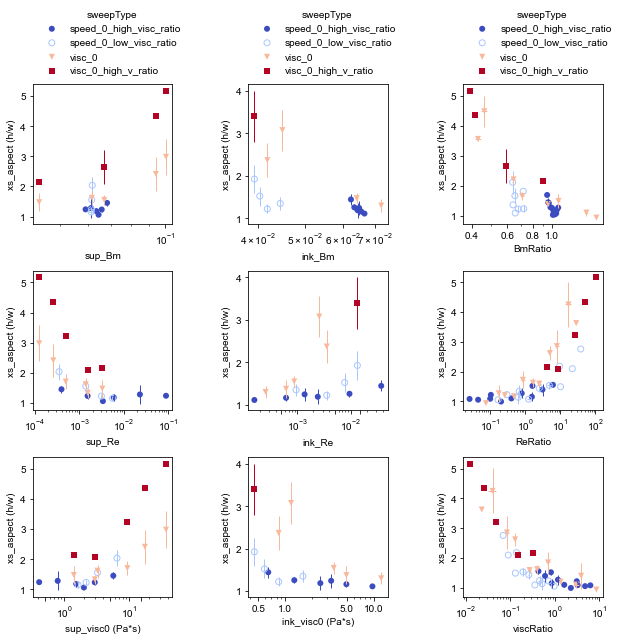

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [101]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
sslap = me.addRatios(sslap, varlist=['Bm'], operator='Ratio')
sslap = sslap[sslap.ink_Bm>10**-3]
# dEst
fig, axs = plt.subplots(3,3, figsize=(9,9))
for j,s1 in enumerate(['Bm', 'Re', 'visc0']):
    if j==2:
        rat = 'viscRatio'
    else:
        rat = s1+'Ratio'
    for i, s in enumerate(['sup_'+s1, 'ink_'+s1,rat]):
        mp.scatterSS(sslap,  s, 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[j][i], units=u,  legend=(j==0))
fig.tight_layout()

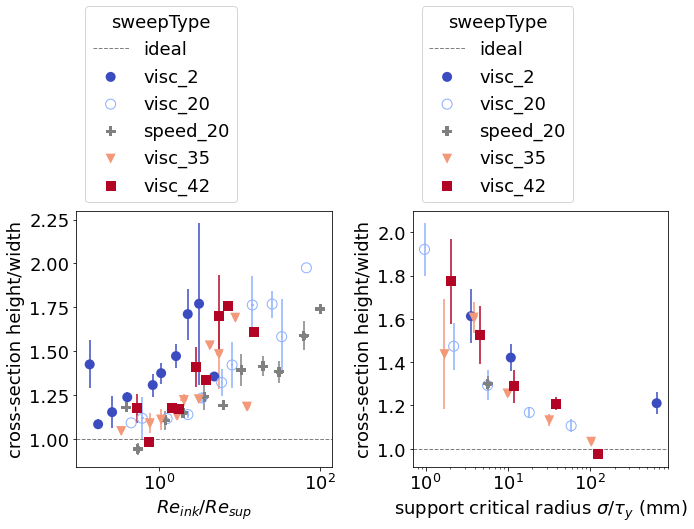

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.sup_visc0>0.03]
fig,axs = plt.subplots(1,2,figsize=(10,10))
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
mp.scatterSS(ssca, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[0],  markersize=100, fontsize=18)
mp.scatterSS(ssca, 'sup_rPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[1], markersize=100, fontsize=18)
axs[0].set_xlabel('$Re_{ink}/Re_{sup}$')
axs[0].set_ylabel('cross-section height/width')
axs[1].set_ylabel('cross-section height/width')
axs[1].set_xlabel('support critical radius $\sigma/{\\tau}_y$ (mm)')
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'rcrit.svg'), bbox_inches='tight', dpi=300)

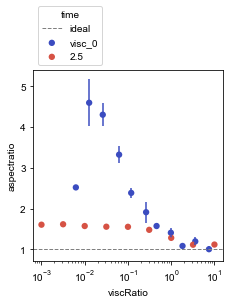

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [403]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,1,figsize=(3.5, 3.5))
sslap2 = sslap[sslap.sweepType=='visc_0']
fs = 10
ms = 40
mp.scatterSS(sslap2, 'viscRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs, units=u, legend=True, color=cmap(0), fontsize=fs, markersize=ms)
ss0s = sims.copy()
sslap = sims.copy()
sslap = sslap[(sslap.sigma==0)&(sslap.tau0ink==0)&(sslap.tau0sup==0)]
mp.scatterSS(sslap, 'viscRatio', 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs, units=usim, legend=True,  fontsize=fs, color=cmap(0.9), markersize=ms)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_visc.svg'), bbox_inches='tight', dpi=120)

C:\Users\lmf1\Miniconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


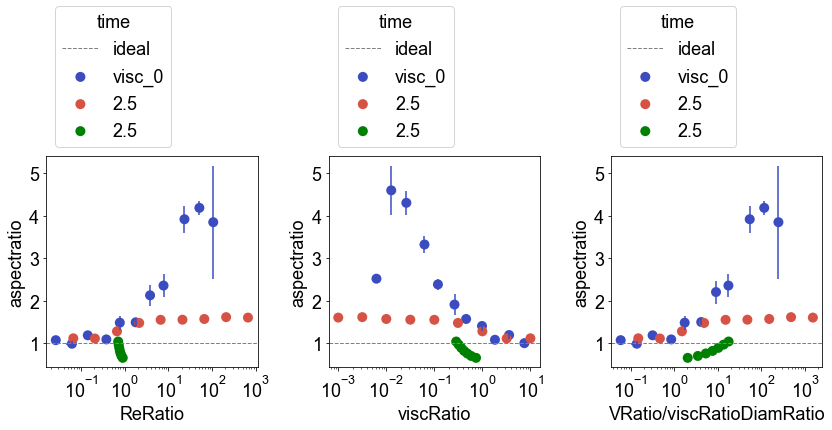

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [53]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,3,figsize=(12,9))
sslap2 = sslap[sslap.sweepType=='visc_0']
fs = 18
ms = 100
ss0cone = simscone.copy()
sssims = sims.copy()
sssims = sssims[(sssims.sigma==0)&(sssims.tau0ink==0)&(sssims.tau0sup==0)]
ss0cone['VRatio/viscRatioDiamRatio'] = ss0cone['dsup']/ss0cone['dink']*ss0cone['vink']/ss0cone['vsup']/(ss0cone['viscRatio'])
sssims['VRatio/viscRatioDiamRatio'] = sssims['dsup']/sssims['dink']*sssims['vink']/sssims['vsup']/(sssims['viscRatio'])
sslap2['VRatio/viscRatioDiamRatio'] = sslap2['do']/sslap2['di']*sslap2['ink_v']/sslap2['sup_v']/(sslap2['viscRatio'])
for i,s in enumerate(['ReRatio', 'viscRatio', 'VRatio/viscRatioDiamRatio']):
    mp.scatterSS(sslap2, s, 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[i], units=u, legend=True, color=cmap(0), fontsize=fs, markersize=ms)
    mp.scatterSS(sssims, s, 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs[i], units=usim, legend=True,  fontsize=fs, color=cmap(0.9), markersize=ms)
    mp.scatterSS(ss0cone, s, 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs[i], units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)
fig.tight_layout()

# fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_visc.svg'), bbox_inches='tight', dpi=120)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c388220208>)

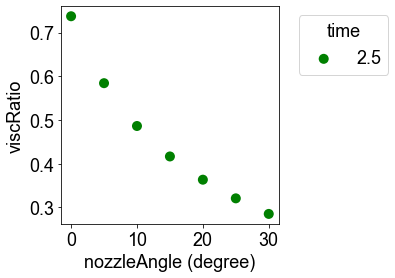

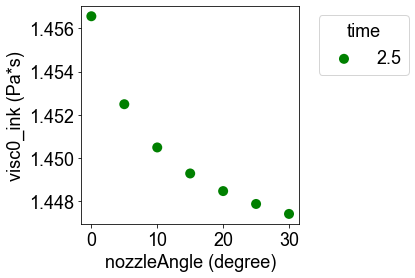

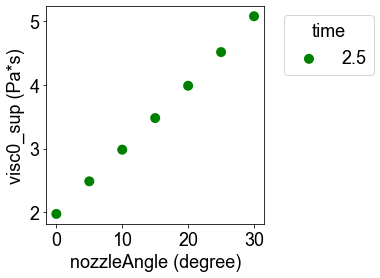

In [57]:
mp.scatterSS(ss0cone, 'nozzleAngle', 'viscRatio', 'time',gradColor=0, units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)
mp.scatterSS(ss0cone, 'nozzleAngle', 'visc0_ink', 'time',gradColor=0, units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)
mp.scatterSS(ss0cone, 'nozzleAngle', 'visc0_sup', 'time',gradColor=0, units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)

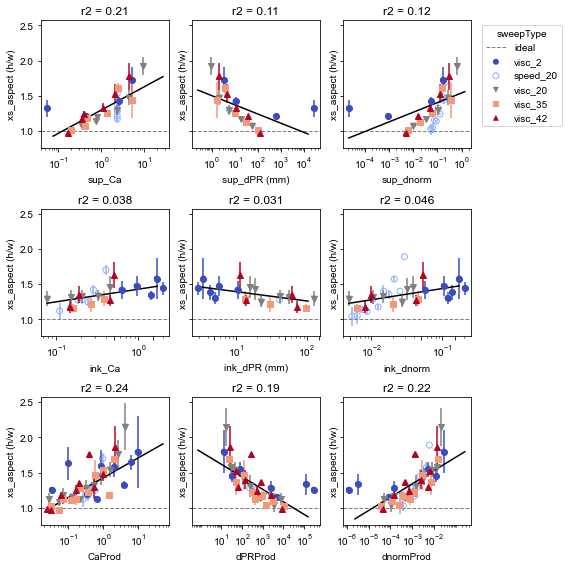

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0.copy()
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
# ssca = ssca[ssca.sup_dPR<10**2]
fig,axs = plt.subplots(3,3,figsize=(8,8), sharey=True)
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
ssca = me.addRatios(ssca, varlist=['Ca', 'dPR', 'dnorm'], operator='Prod')

for i,s1 in enumerate(['sup', 'ink', 'Prod']):
    for j, s2 in enumerate(['Ca', 'dPR', 'dnorm']):
        kwargs = {'logx':True, 'logy':False, 'gradColor':0, 'yideal':1, 'units':u, 'legend':((i==0)&(j==2)), 'legendloc':'right'}
        if i==2:
            xvar = s2+s1
        else:
            xvar = s1+'_'+s2
        mp.scatterSS(ssca, xvar, 'xs_aspect', 'sweepType', ax=axs[i][j], **kwargs)
        ssca[xvar+'_log'] = np.log10(ssca[xvar])
        mp.regressionSS(ssca, xvar+'_log', 'xs_aspect', axs[i][j], log=True)
for i in range(3):
    for j in range(3):
        mp.setSquare(axs[i][j])
fig.tight_layout()
#fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_ca_d.svg'), bbox_inches='tight', dpi=120)

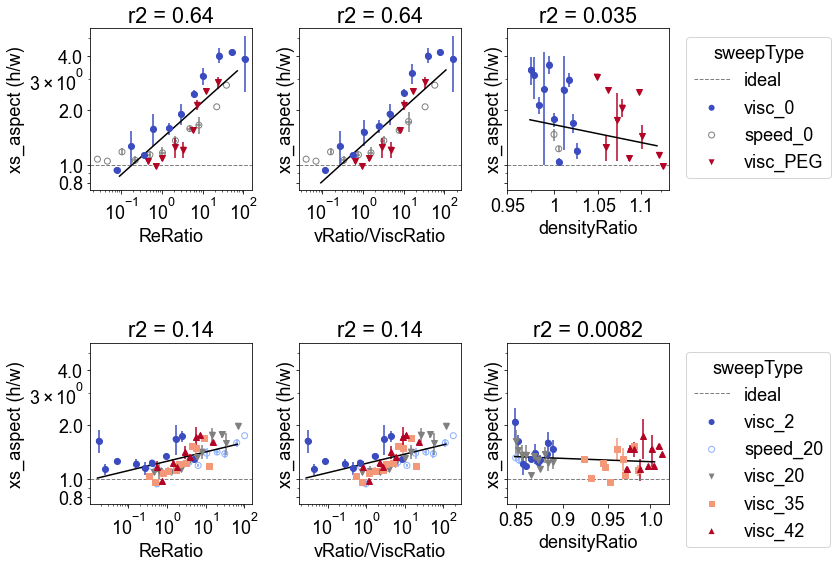

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
sslap = ss0.copy()
# sslap = sslap[sslap.sigma==0]
fig,axs = plt.subplots(2,3,figsize=(12, 9), sharey=True)
sslap['vRatio/ViscRatio'] = sslap['vRatio']/sslap['viscRatio']
sslap['densityRatio'] = sslap['ink_density']/sslap['sup_density']
sslap.loc[sslap.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
sslap.loc[sslap.sweepType.str.contains('speed_0'), 'sweepType']='speed_0'
sslap.loc[sslap.sweepType.str.contains('visc_0'), 'sweepType']='visc_0'
ssca = sslap[sslap.sigma>0]
sslap = sslap[sslap.sigma==0]
for i,s1 in enumerate(['ReRatio', 'vRatio/ViscRatio', 'densityRatio']):
    for j, ssi in enumerate([sslap, ssca]):
        kwargs = {'logx':True, 'logy':True, 'gradColor':0, 'yideal':1, 'units':u, 'legend':(i==2), 'legendloc':'right', 'fontsize':18}
        mp.scatterSS(ssi, s1, 'xs_aspect', 'sweepType', ax=axs[j][i], **kwargs)
        ssi[s1+'_log'] = np.log10(ssi[s1])
        ssi['xs_aspect_log'] = np.log10(ssi['xs_aspect'])
        mp.regressionSS(ssi, s1+'_log', 'xs_aspect_log', axs[j][i])
axs[0][2].set_xticks([0.95, 1, 1.05, 1.1])
axs[0][2].set_xticklabels([0.95, 1, 1.05, 1.1])
for i in range(3):
    for j in range(2):
        mp.setSquare(axs[j][i])

fig.tight_layout()
#fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_ca_d.svg'), bbox_inches='tight', dpi=120)

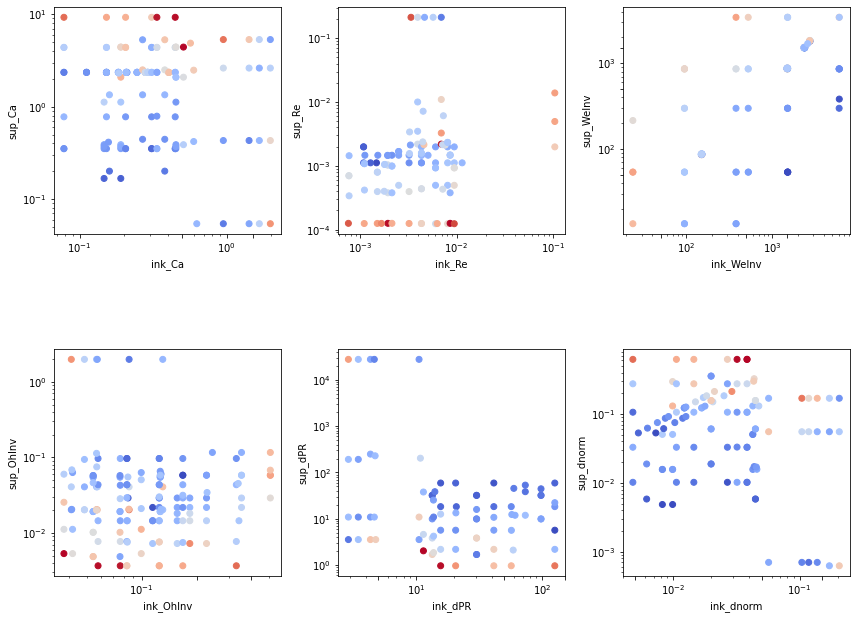

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [382]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.xs_aspect>0.5]
fig, axs = plt.subplots(2,3, figsize=(12,10))
d = 0
mp.scatterSS(ss1, 'ink_Ca', 'sup_Ca', 'xs_aspect', gradColor=1, logx=True, logy=True,  dx=d, dy=d, ax=axs[0,0], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_Re', 'sup_Re', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[0,1], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_WeInv', 'sup_WeInv', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[0,2], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_OhInv', 'sup_OhInv', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[1,0], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_dPR', 'sup_dPR', 'xs_aspect',  gradColor=1, logx=True, logy=True,  dx=d, dy=d, ax=axs[1,1], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_dnorm', 'sup_dnorm', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[1,2], cmapname='coolwarm', legend=False)
fig.tight_layout()

### area

### yshift

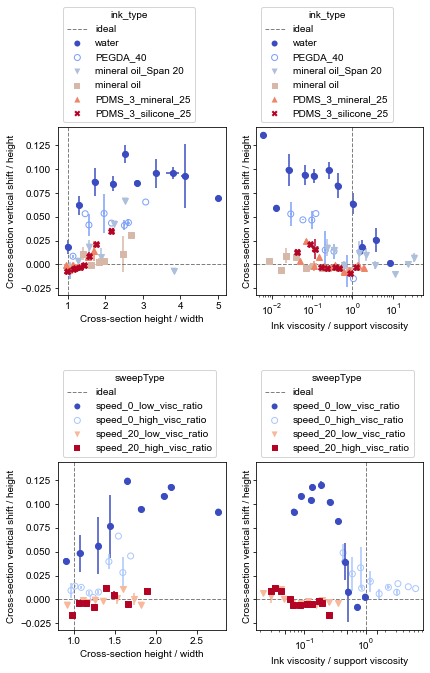

In [12]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_yshift_SE<0.05]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,2,figsize=(6, 10), sharey=True)
for i,s in enumerate(['xs_aspect', 'viscRatio']):
    kwargs = {'logx':(i>0), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1[ss1.vRatio==1], s, 'xs_yshift', 'ink_type',ax=axs[0][i], **kwargs)
    mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], s, 'xs_yshift', 'sweepType',ax=axs[1][i], **kwargs)
for i in range(2):
    for j in range(2):
        mp.setSquare(axs[i][j])
        axs[i][j].set_ylabel('Cross-section vertical shift / height')
    axs[i][0].set_xlabel('Cross-section height / width')
    axs[i][1].set_xlabel('Ink viscosity / support viscosity')
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_yshift.svg'), bbox_inches='tight', dpi=120)